# Predicting treatment outcome in breast cancer patients

Les données contenues dans `breast_cancer_data.tsv` décrivent des tumeurs de patientes atteintes de cancer du sein par 18 variables, toutes mesurées avant traitement :

- `Age` : âge (en années) 
- `Menopausal status` : 0=pré-ménopause, 1=post-ménopause
- `T stage` : classification (0-4) de la tumeur selon [la classification TMN](https://fr.wikipedia.org/wiki/Classification_TNM)
- `N stage` : classification (0-2) de l'atteinte ganglionnaire selon [la classification TMN](https://fr.wikipedia.org/wiki/Classification_TNM)
- `ER Status` :	si la tumeur présente des récepteurs d'œstrogène (0=négatif, 1=positif) 
- `PR Status` : si la tumeur présente des récepteurs de progestérone (0=négatif, 1=positif)
- `Ki67 25%` : si le marqueur de prolifération Ki67 est surexprimé (0=négatif, 1=positif)
- `TILs 30%` : si l'infiltration lymphocitaire est élevée (0=négatif, 1=positif)
- `Breast Density`	: densité mammaire selon [la classification Bi-RADS](https://en.wikipedia.org/wiki/BI-RADS) (0=A, 1=B, 2=C, 3=D)
- `US LN Cortex` : évaluation sur imagerie par ultrasons (_US_) de la capsule (_cortex_) des ganglions lymphatiques (_lymph nodes, LN_) (0=Thin, 1=Thickened)
- `Intratumoral high SI on T2` : évaluation de l'intensité du signal (_high SI = high signal intensity_) sur [IRM T2*](https://en.wikipedia.org/wiki/T2*-weighted_imaging) (0=absent, 1=présent)
- `Peritumoral Edema` : œdème péritumoral (0=absent, 1=présent)
- `Prepectoral Edema` :  œdème prépectoral (0=absent, 1=présent)
- `Subcutaneous Edema` : œdème sous-cutané (0=absent, 1=présent)
- `Multifocality` : multifocalité (présence de sites supplémentaires de malignité) (0=absent, 1=présent)
- `Maximal MR Size`	: taille (estimée sur l'IRM, selon son plus grand axe) de la masse tumorale
- `Index Lesion MR Size` : taille (estimée sur l'IRM, selon son plus grand axe) de la lésion initiale 
- `Size of Largest LN metastasis (mm)` : taille de la plus grande métastase ganglionnaire

Ces variables appartiennent à 3 modalités différentes :
- variables cliniques : `Age`, `BMI`, `Menopausal status`, `T stage`, `N stage`
- variables histologiques : `ER Status`, `PR Status`, `Ki67 25%`, `TILs 30%`
- variables d'imagerie : `Breast Density`, `US LN Cortex`, `Intratumoral high SI on T2`, `Peritumoral Edema`, `Prepectoral Edema`, `Subcutaneous Edema`, `Multifocality`, `Maximal MR Size`, `Index Lesion MR Size`, `Size of Largest LN metastasis (mm)`.

Le fichier `breast_cancer_pcr.tsv` contient la variable (étiquette) `pCR Status` (_pCR = pathological complete response_), qui décrit si oui ou non le traitement par chimiothérapie donné a permis d'éliminer la tumeur.

Le but du projet est d'évaluer si les variables proposées permettent de prédire la réponse `pCR Status`.

## Instructions
1. Comparer les performances d'au moins deux algorithmes d'apprentissage non-linéaires sur ce problème. (Justifier le choix de ces algorithmes.)

__Attention :__
- au _data leakage_
- aux échelles prises par les différentes variables
- à sélectionner de manière appropriée les hyperparamètres les plus pertinents 
- à utiliser une mesure de performance appropriée (justifier son choix)

2. Évaluer l'utilité de chacune des modalités : par exemple, la performance est-elle dégradée si l'on se prive des variables d'imagerie ?

Penser à commenter et interpréter les résultats.

## Librairies utiles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns

## Chargement des données

Dataset shape: (243, 18)

Class distribution:
pCR Status
0    0.563786
1    0.436214
Name: proportion, dtype: float64


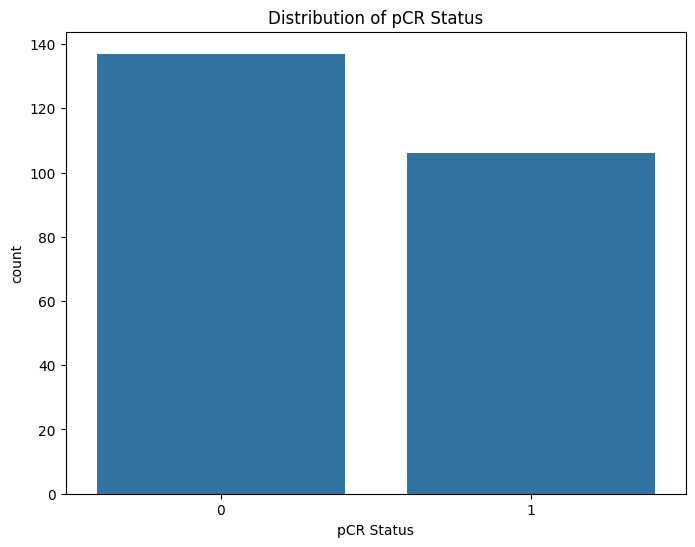

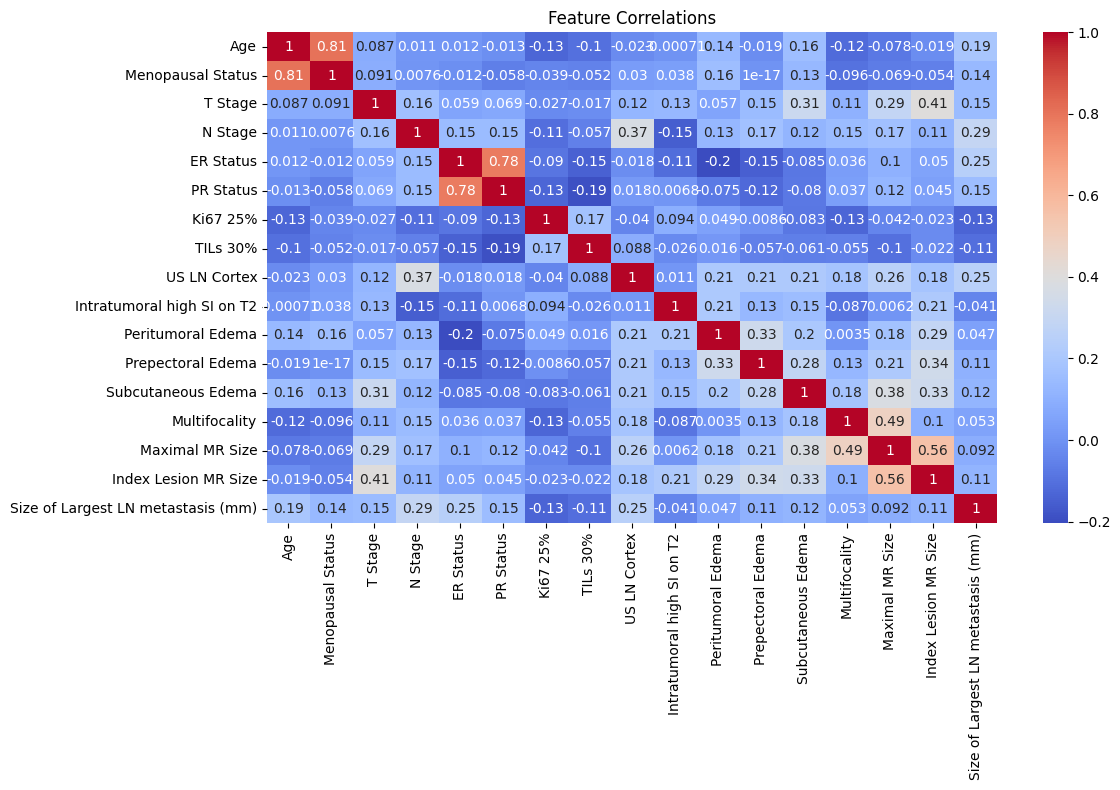

In [2]:
df_data = pd.read_csv("breast_cancer_data.tsv", sep="\t")
X = np.array(df_data)

df_pcr = pd.read_csv("breast_cancer_pcr.tsv", sep="\t")
y = np.array(df_pcr)

# Data exploration
print("Dataset shape:", X.shape)
print("\nClass distribution:")
print(df_pcr['pCR Status'].value_counts(normalize=True))

# Identify categorical columns that need one-hot encoding
categorical_features = ['T stage', 'N stage', 'Breast Density']
numeric_features = [col for col in df_data.columns if col not in categorical_features]

# Create visualization of class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_pcr, x='pCR Status')
plt.title('Distribution of pCR Status')
plt.show()

# Feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df_data[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.tight_layout()
plt.show()

Idées : 
- observer les données : répartition des deux classes

- standardiser ? l'age en année, etc. Enfin pas pour le RF
- one hot encoding des stages, breast density
- première intention RF
- 2e, SVM rbf (non linéaire) ?